In [203]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Set Up

### Extracting the data
##### Utilizing Yahoo finance's API to get the relevant that we need

In [204]:
# creating a defined function for importing stock data
def import_securities_data(securities_tickers, enter_time_amount, enter_time_type):

    # time delta method function doesnt take the following date time types, it only takes in days. so we convert the respective time types into days by doing some quick math for the user to convert into days
    other_times_types = ['y', 'Y',  'm', 'M', 'w', 'W']
    
    month_type = ['m', 'M']

    week_type = ['w', 'W']

    year_type = ['y', 'Y']

    # if statement that allows us to make a conditional statement to see if the user has inputted any of the time types listed under the other_times_types variable. if so is the case it moves on to the follwing if conditional statements and executes the respective function under the if statenebt that the conditional value was true
    if enter_time_type in other_times_types:
        
        if enter_time_type in month_type: 
            
            enter_time_amount = 30 * enter_time_amount

        elif enter_time_type in week_type:

            enter_time_amount = 7 * enter_time_amount
        
        elif enter_time_type in year_type:

            enter_time_amount = 365 * enter_time_amount

    
    # create a variable to assign the end date and start dates of the data that we want to dowload, the start date is dynamic and customizable to the user's preference of the data one want to download
    # credit to John Droescher for this part of the code
    start_date = dt.datetime.today() - pd.Timedelta(enter_time_amount, "d")
    end_date = dt.datetime.today()
    
    # this returns all of the securities related historical data utilizing yahoo finance's API
    return yf.download(start= start_date, end= end_date, tickers= securities_tickers)

In [205]:
# creating a list of the ticker names of the stocks we want to use for our portfolio. This will help us in downloading the data from the yf alius library that was declared as well for creating the ticker column in our pandas dataframe
stock_pick = ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']
etf_pick = ['SPY', 'IWM', 'DIA']

# this will download all of the relevant data related to our constituent's of selected stocks and etfs
portfolio_individual = import_securities_data(stock_pick, 1, "y")
portfolio_etf = import_securities_data(etf_pick, 1, "y")

[*********************100%%**********************]  7 of 7 completed


[*********************100%%**********************]  3 of 3 completed


In [206]:
# visualizing the data to make sure all the data was imported correctly
portfolio_individual

Price        Adj Close                                               \
Ticker            AAPL        BND          F         JPM         KO   
Date                                                                  
2023-02-13  153.033157  70.769058  12.592957  138.611145  58.746586   
2023-02-14  152.386597  70.526924  12.477512  139.223648  57.767479   
2023-02-15  154.505295  70.371971  12.439032  139.806992  57.767479   
2023-02-16  152.893890  70.100784  12.419790  137.881958  57.408798   
2023-02-17  151.740067  70.255745  12.400551  138.290298  58.281269   
...                ...        ...        ...         ...        ...   
2024-02-07  189.168625  72.620003  12.800000  175.429993  59.990002   
2024-02-08  188.080017  72.430000  12.830000  174.800003  59.830002   
2024-02-09  188.850006  72.370003  12.680000  175.009995  59.560001   
2024-02-12  187.149994  72.389999  12.980000  175.789993  59.700001   
2024-02-13  185.039993  71.760002  12.680000  174.259995  59.349998   

Price                                   Close                    ...  \
Ticker            MSFT          O        AAPL        BND      F  ...   
Date                                                             ...   
2023-02-13  268.935364  63.619492  153.850006  73.070000  13.09  ...   
2023-02-14  269.777924  62.255207  153.199997  72.820000  12.97  ...   
2023-02-15  267.621582  62.908936  155.330002  72.660004  12.93  ...   
2023-02-16  260.496796  62.823654  153.710007  72.379997  12.91  ...   
2023-02-17  256.432587  62.643650  152.550003  72.540001  12.89  ...   
...                ...        ...         ...        ...    ...  ...   
2024-02-07  414.049988  53.360001  189.410004  72.620003  12.80  ...   
2024-02-08  414.109985  53.160000  188.320007  72.430000  12.83  ...   
2024-02-09  420.549988  52.759998  188.850006  72.370003  12.68  ...   
2024-02-12  415.260010  52.669998  187.149994  72.389999  12.98  ...   
2024-02-13  406.320007  51.520000  185.039993  71.760002  12.68  ...   

Price            Open                           Volume                       \
Ticker             KO        MSFT          O      AAPL       BND          F   
Date                                                                          
2023-02-13  59.900002  267.640015  67.000000  62199000   3805800   64201900   
2023-02-14  60.209999  272.670013  67.029999  61707600   4328000   75352900   
2023-02-15  59.900002  268.320007  65.720001  65573800   4370800   65850000   
2023-02-16  59.230000  264.019989  65.830002  68167900   5912000   64145500   
2023-02-17  59.500000  259.390015  66.300003  59144100   5165700   54401000   
...               ...         ...        ...       ...       ...        ...   
2024-02-07  60.070000  407.440002  53.750000  53439000   9257500  137224000   
2024-02-08  59.889999  414.049988  53.270000  40962000   7987500   68653900   
2024-02-09  59.470001  415.250000  53.029999  45099900   5940700   47612200   
2024-02-12  59.660000  420.559998  52.840000  41781900   6063000   54036500   
2024-02-13  59.500000  404.940002  51.740002  54080860  12938193   64345426   

Price                                             
Ticker          JPM        KO      MSFT        O  
Date                                              
2023-02-13  7134600  16191800  44630900  2237800  
2023-02-14  9249400  20505700  37047900  3228300  
2023-02-15  6728300  13171400  28922400  2425900  
2023-02-16  8165300  16538300  29603600  2447500  
2023-02-17  7948800  16814700  30000100  2891900  
...             ...       ...       ...      ...  
2024-02-07  7225500  10259900  22340500  4686700  
2024-02-08  6060300  12874800  21225300  4484400  
2024-02-09  6295900  15231400  22012900  6514200  
2024-02-12  8539300  13516800  21202900  5069600  
2024-02-13  6407725  20861853  27192544  9686013  

[252 rows x 42 columns]

In [207]:
# visualizing the data to make sure all the data was imported correctly
portfolio_etf

Price        Adj Close                               Close              \
Ticker             DIA         IWM         SPY         DIA         IWM   
Date                                                                     
2023-02-13  335.928009  189.772293  406.649445  342.549988  192.600006   
2023-02-14  334.545258  189.683609  406.462311  341.140015  192.509995   
2023-02-15  335.055237  191.604996  407.782257  341.660004  194.460007   
2023-02-16  330.867767  189.772293  402.167572  337.390015  192.600006   
2023-02-17  332.294037  190.294495  401.162872  338.290009  193.130005   
...                ...         ...         ...         ...         ...   
2024-02-07  386.670013  193.220001  498.100006  386.670013  193.220001   
2024-02-08  387.350006  196.149994  498.320007  387.350006  196.149994   
2024-02-09  386.720001  199.339996  501.200012  386.720001  199.339996   
2024-02-12  388.109985  202.960007  500.980011  388.109985  202.960007   
2024-02-13  382.820007  194.610001  494.079987  382.820007  194.610001   

Price                         High                                 Low  \
Ticker             SPY         DIA         IWM         SPY         DIA   
Date                                                                     
2023-02-13  412.829987  342.559998  192.860001  412.970001  338.880005   
2023-02-14  412.640015  343.529999  193.949997  415.049988  338.410004   
2023-02-15  413.980011  341.670013  194.550003  414.059998  338.630005   
2023-02-16  408.279999  340.890015  194.869995  412.910004  337.309998   
2023-02-17  407.260010  338.429993  193.369995  407.510010  335.079987   
...                ...         ...         ...         ...         ...   
2024-02-07  498.100006  387.450012  194.149994  498.529999  385.649994   
2024-02-08  498.320007  387.660004  196.369995  498.709991  385.510010   
2024-02-09  501.200012  387.500000  199.550003  501.649994  385.760010   
2024-02-12  500.980011  389.410004  203.550003  503.500000  386.440002   
2024-02-13  494.079987  385.160004  197.630005  497.089996  380.470001   

Price                                     Open                          \
Ticker             IWM         SPY         DIA         IWM         SPY   
Date                                                                     
2023-02-13  189.309998  408.239990  338.880005  190.509995  408.720001   
2023-02-14  190.080002  408.510010  341.519989  191.279999  411.239990   
2023-02-15  190.529999  409.470001  339.459991  190.979996  410.350006   
2023-02-16  191.250000  408.140015  338.500000  191.800003  408.790009   
2023-02-17  190.970001  404.049988  335.720001  191.880005  406.059998   
...                ...         ...         ...         ...         ...   
2024-02-07  192.039993  495.359985  386.390015  194.070007  496.290009   
2024-02-08  192.710007  497.260010  387.470001  193.360001  498.100006   
2024-02-09  196.449997  498.489990  387.190002  196.919998  498.839996   
2024-02-12  199.839996  500.239990  386.489990  199.869995  501.170013   
2024-02-13  193.059998  490.720001  385.070007  196.220001  494.529999   

Price        Volume                       
Ticker          DIA       IWM        SPY  
Date                                      
2023-02-13  2653900  15754400   64913500  
2023-02-14  3501100  21889600   88389300  
2023-02-15  1967700  18721200   61555700  
2023-02-16  3229600  21366300   76431500  
2023-02-17  3034200  23892200   89257800  
...             ...       ...        ...  
2024-02-07  2797600  31713900   70556500  
2024-02-08  2549800  35370800   52343600  
2024-02-09  3523600  46091300   63917600  
2024-02-12  2412200  43291000   56502300  
2024-02-13  5258398  85556260  112483176  

[252 rows x 18 columns]

In [208]:
# creating a definition function in order to be able to the take data that I create for each of the columns through code and put it into the original dataframe named under the variable 'df'. this is a repetitive task everytime im trying to create the data for every column nad putting into calumn into pandas dataframe
def import_data(dest_df, origin_df, column_name):

    # making the dataset into a dataframe in order to merge the data with the original dataset
    df1 = pd.DataFrame(origin_df)

    # reseting the index so that it doesnt cause trouble when im trying to iterate through the data in the for loop
    df1.reset_index(inplace= True)

    # iterating through the pandas dataframe and separating the index and values with index and val variables. in this case, val variable holds the ticker symbol and the numbers for the annualized volatility
    for index, val in df1[['Ticker', 0]].iterrows():

        # setting a variable for ticker and extracting the ticker as the ticker is together with the annualized volatility data under the val variable
        ticker = val['Ticker']
        value = val[0]

        # making sure that the data its iterating through matches with one of the tickers in my orginal dataset, the 'df' variable 
        if ticker in dest_df['ticker'].values:

            # when it finds that match with the ticker in the original data set it then uses loc to locate in what row the ticker is and then it creates the annualize_volatility column to append the value to that row in that column
            dest_df.loc[dest_df['ticker'] == ticker, f'{column_name}'] = value
    
    return

# Part 1

#### Creating Portfolio Pandas Dataframe

##### Ticker Column

In [209]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# here ticker is the title of our column and the list with the stock symbols is our values within our column that has the title ticker
stock_pick_dict = { 'ticker': ['AAPL', 'MSFT', 'F', 'O', 'BND', 'KO', 'JPM']}

# creating the dataframe using pandas library
df = pd.DataFrame(stock_pick_dict)

# visualizing the dataframe
df

,ticker
0,AAPL
1,MSFT
2,F
3,O
4,BND
5,KO
6,JPM


 ##### Portfolio Weight (Equally Weighted) Column

In [210]:
# all assets that are being held in this portfolio are equal weighted. so we want to make sure of that by taking the total of a pie, 100%, and divide it by the count of stocks that we have within our portfolio
df['portfolio_weight'] = np.divide(1, df['ticker'].count()).round(4)

df

,ticker,portfolio_weight
0,AAPL,0.1429
1,MSFT,0.1429
2,F,0.1429
3,O,0.1429
4,BND,0.1429
5,KO,0.1429
6,JPM,0.1429


##### Annualized Volatility (Trailing 3 Month) Column

In [211]:
# filtering for data from three months ago using the pandas query function. credit to @https://stackoverflow.com/questions/59692194/pandas-filter-data-that-are-in-last-n-month-using-query

# creating a variable to get todays full date
now = pd.to_datetime('now')

# creating a variable that offsets today's date by 3 months
last_three_months = now - pd.DateOffset(months=3)

# leverging query dunction to filter for all of the data that is less than and equal to the offsetted data. This means that we've filtered for data between now and three months ago
portfolio_three_month_trail = portfolio_individual['Adj Close'].query('Date >= @last_three_months')

# visualizing data to check if the code is working correctly
portfolio_three_month_trail.tail()

Ticker,AAPL,BND,F,JPM,KO,MSFT,O
Date,,,,,,,
2024-02-07,189.168625,72.620003,12.80,175.429993,59.990002,414.049988,53.360001
2024-02-08,188.080017,72.430000,12.83,174.800003,59.830002,414.109985,53.160000
2024-02-09,188.850006,72.370003,12.68,175.009995,59.560001,420.549988,52.759998
2024-02-12,187.149994,72.389999,12.98,175.789993,59.700001,415.260010,52.669998
2024-02-13,185.039993,71.760002,12.68,174.259995,59.349998,406.320007,51.520000


In [212]:
# setting a definition method to calculate the annual volatility of the stock portfolio
def calc_annual_vol(portfolio):

    # calculating the percentage change to get the daily returns
    daily_returns_data = portfolio.pct_change()

    # getting the annualized volatility for each of the stocks. Credit to Yves Hilpisch the author for the python for finance V.2018 (pg.19)
    annualized_volatility_data = (daily_returns_data.std() * np.sqrt(252)).round(4)

    return annualized_volatility_data

In [213]:
# using definition method to import the three month trailing portfolio and calculate the annual volatility of the portfolio
annualized_volatility_data = calc_annual_vol(portfolio_three_month_trail)

# creating a column for annualized volatility and importing the data to the respective ticker using the import data definition function
import_data(df, annualized_volatility_data, 'annualized_volatility')

# checking original dataset to make sure all of the data was appended to the corresponding ticker
df


,ticker,portfolio_weight,annualized_volatility
0,AAPL,0.1429,0.1738
1,MSFT,0.1429,0.1783
2,F,0.1429,0.3456
3,O,0.1429,0.2064
4,BND,0.1429,0.0697
5,KO,0.1429,0.1152
6,JPM,0.1429,0.1140


##### Beta Againts ETFs (SPY, IWM, DIA) (Using Trailing 12-months) Columns

In [214]:
# creating a definition function to calculate beta. credit to: https://github.com/sammuharem/beta-calculator/blob/main/Stock%20Beta%20Calculator.py look at the calculatebeta function
def beta_calc(stock_returns, market_returns):
    
    # calculating covariance of stock returns and market returns, using numpy's universal functions 
    covariance = np.cov(stock_returns, market_returns)

    # caluculating variance of market returns, using numpy's universal functions 
    variance = np.var(market_returns)
    
    # implementing the beta formula. here we are extracting the covariance of the stock market returns and market returns from the matrix that was created in the previous code with the covariance variable. we then take that covariance and divide it by the variance formula and return the value of that formula as the result of using the definition function
    return covariance[0,1] / variance

In [215]:
# calculating portfolio's stocks returns
stock_adjclose_returns = portfolio_individual['Adj Close'].pct_change()

# calculating etf returns
etf_adjclose_returns = portfolio_etf['Adj Close'].pct_change()

# reseting the index so that it doesnt cause problems when trying to iterate through the dataset
stock_adjclose_returns.reset_index(inplace= True)
etf_adjclose_returns.reset_index(inplace= True)

In [216]:
# the logic of this for loop is to grab an etf and then get all stocks on our portfolio along with the returns data to calculate the beta of all of the stocks against that one selected etf. then after it is done calculating the beta for each of the stocks against that one etf, it goes back and pulls another etf and starts calculating the beta for each of the stocks against the new selected etf

# looping through etf returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed etf and etf data holds the data related to the returns values
for etf_ticker, etf_data in etf_adjclose_returns.iloc[1:,1:].items():
    
    # this a counter variable, set up so that the for loop that is below can loop the same amount of times as the count of stocks that we have on our portfolio, which is 7. so we want the for loop to loop 7 times so that we can loop through all of the stock tickers
    counter = 0

    # looping through stock returns data and splitting the data into two variables, ticker and data. the ticker holds the ticker name of the listed stock and stock data holds the data related to the stock's returns values
    for stock_ticker, stock_data in stock_adjclose_returns.iloc[1:,1:].items():
        
        # this is variable set up to calculate the beta of a stock returns against the returns of an etf. In this case we have grabbed one etf and we are looping through the list of stock symbols and extracting their respective returns data and applying the beta calculator method that we have created 
        beta = beta_calc(stock_data, etf_data)

        # takes the ticker that was selected from the for loop and finds the respective ticker's row in the original dataframe, named under the variable 'df'. Then, it creates a new column or finds the respective column and inputs the value respective to the row that the ticker matched on the original dataframe 
        df.loc[df['ticker'] == stock_ticker, f'Beta against {etf_ticker}'] = beta

        # this adds a 1 to the counter variable every time the for loop loop's through the set of instructions
        counter += 1

        # the purpose of this if statement is to renew counter to 0 if it equals the count of stocks that we have picked for our portfolio under our variable that contains the list of the stock symbls we have chosen. we do this because we want to only loop throughout the for loop only for the amount of stocks that we have in our portfolio
        if counter == len(stock_pick): 
            
            # if we have reached the count of ticker symbols in our portfolio, then we reset our counter by making it equal to 0 for the next for loop to happen
            counter = 0

            # lastly we set a break in order to get out of the loop and go back all the way back to the for loop with the etf data in order to grab the next etf that we want to compare our stocks against as our market
            break
            

In [217]:
# viewing the data to make sure all of the data was appended to the correct stock ticker
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471
2,F,0.1429,0.3456,1.655811,0.975638,1.366891
3,O,0.1429,0.2064,0.887180,0.516038,0.708007
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006


##### Weekly Drawdrowns (Average and Maximum) Columns

In [218]:
# resampling our data so that we have our stock data based on end of the week data. In other words, we are taking the closing price of every Friday
Weekly_data = portfolio_individual[['High', 'Low']].resample('1w', label= 'right').last()

# viewing the data
Weekly_data.head()

Price             High                                                       \
Ticker            AAPL        BND      F         JPM         KO        MSFT   
Date                                                                          
2023-02-19  153.000000  72.550003  12.94  142.830002  60.230000  260.089996   
2023-02-26  147.190002  72.029999  11.98  141.360001  59.910000  251.000000   
2023-03-05  151.110001  71.879997  13.11  143.740005  59.680000  255.619995   
2023-03-12  150.940002  72.830002  12.51  135.259995  60.139999  252.789993   
2023-03-19  156.740005  73.919998  11.73  128.479996  60.349998  283.329987   

Price                         Low                                           \
Ticker              O        AAPL        BND      F         JPM         KO   
Date                                                                         
2023-02-19  66.400002  150.850006  72.190002  12.65  140.070007  59.380001   
2023-02-26  65.849998  145.720001  71.800003  11.75  138.929993  59.389999   
2023-03-05  64.790001  147.330002  71.529999  12.65  141.080002  59.209999   
2023-03-12  63.490002  147.610001  72.410004  12.00  127.820000  58.990002   
2023-03-19  62.389999  154.279999  73.489998  11.12  125.449997  59.639999   

Price                              
Ticker            MSFT          O  
Date                               
2023-02-19  256.000000  65.639999  
2023-02-26  248.100006  64.660004  
2023-03-05  251.389999  64.150002  
2023-03-12  247.600006  61.220001  
2023-03-19  276.320007  61.349998

In [219]:
# using the drawdown formula -->  (week low price - week high price) diveded by week high price --- and then taking the mean of each to get the average weekly drawdown. credit to Kayla, Ashanti and Edosa's repo
Average_Weekly_Drawdown = ((Weekly_data['Low'] - Weekly_data['High']) / Weekly_data['High']).mean()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, Average_Weekly_Drawdown, 'average_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512,-0.015380
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471,-0.018204
2,F,0.1429,0.3456,1.655811,0.975638,1.366891,-0.027604
3,O,0.1429,0.2064,0.887180,0.516038,0.708007,-0.015486
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366,-0.003976
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679,-0.011947
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006,-0.017214


In [220]:
# using the drawdown formula --> (week low price - week high price) divided by week high price --- and then taking the max of each variable within the formila  to get the maximum weekly drawdown. credit to Kayla, Ashanti and Edosa's repo
maximum_weekly_drawdown = (Weekly_data['Low'].min() - Weekly_data['High'].max()) / Weekly_data['High'].max()

# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, maximum_weekly_drawdown, 'maximum_weekly_drawdown')

# viewing the data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512,-0.015380,-0.265524
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471,-0.018204,-0.411625
2,F,0.1429,0.3456,1.655811,0.975638,1.366891,-0.027604,-0.366732
3,O,0.1429,0.2064,0.887180,0.516038,0.708007,-0.015486,-0.264910
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366,-0.003976,-0.085925
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679,-0.011947,-0.197915
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006,-0.017214,-0.301741


##### Total Returns Columns

In [221]:
# creating a variable to store the stock data that has historical data dating from 10 years ago
portfolio_individual_10y = import_securities_data(stock_pick, 10, 'y')

# viewing data
portfolio_individual_10y.head()



[*********************100%%**********************]  7 of 7 completed


Price       Adj Close                                                        \
Ticker           AAPL        BND         F        JPM         KO       MSFT   
Date                                                                          
2014-02-18  17.175583  62.118156  9.589630  44.259243  27.279186  31.746038   
2014-02-19  16.904419  62.064598  9.502396  43.328518  27.009815  31.822399   
2014-02-20  16.708750  62.056938  9.514859  43.570656  27.155415  32.026001   
2014-02-21  16.523151  62.102840  9.446316  43.593357  27.068056  32.221119   
2014-02-24  16.595501  62.087521  9.458778  43.911171  27.301027  31.975092   

Price                      Close                    ...       Open             \
Ticker              O       AAPL        BND      F  ...         KO       MSFT   
Date                                                ...                         
2014-02-18  26.192772  19.499643  81.169998  15.39  ...  37.980000  37.630001   
2014-02-19  26.291548  19.191786  81.099998  15.25  ...  37.500000  37.220001   
2014-02-20  26.489098  18.969643  81.089996  15.27  ...  37.060001  37.570000   
2014-02-21  26.797760  18.758928  81.150002  15.16  ...  37.590000  37.939999   
2014-02-24  27.112583  18.841070  81.129997  15.18  ...  37.299999  37.689999   

Price                     Volume                                         \
Ticker              O       AAPL      BND         F       JPM        KO   
Date                                                                      
2014-02-18  40.736435  260251600  2767900  32167900  14983800  46098500   
2014-02-19  41.036823  313768000  1985600  26262500  18669900  26645100   
2014-02-20  41.414730  305858000  1079500  20647300  12457000  22639900   
2014-02-21  41.676357  278784800   592600  29967600  16790100  19419800   
2014-02-24  42.063953  288909600  3138000  30412900  16151400  24223500   

Price                          
Ticker          MSFT        O  
Date                           
2014-02-18  32834000  2726544  
2014-02-19  29750400  2817360  
2014-02-20  27526100  2442847  
2014-02-21  38021300  2200534  
2014-02-24  32085100  3294660  

[5 rows x 42 columns]

In [222]:
# utilizing the total returns formula --> (ending value (with dividends) - beginning value) / beginning value -- here i utilized loc to identify the last dates for the adjusted close prices as our ending value and first dates for the open prices as our beginning value (assuming that the beggining of our investement was when the market opened, as orders for stocks start to get fulfilled when market opens). I then round the calculated number to three decimal places for better visibility and relavancy of the data
total_returns = (((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) * 100).round(3)

# viewing data
total_returns


Ticker
AAPL    848.923
BND     -11.517
F       -17.555
JPM     200.345
KO       56.266
MSFT    979.777
O        26.472
dtype: float64

In [223]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, total_returns, 'total_returns')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512,-0.015380,-0.265524,848.923
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471,-0.018204,-0.411625,979.777
2,F,0.1429,0.3456,1.655811,0.975638,1.366891,-0.027604,-0.366732,-17.555
3,O,0.1429,0.2064,0.887180,0.516038,0.708007,-0.015486,-0.264910,26.472
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366,-0.003976,-0.085925,-11.517
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679,-0.011947,-0.197915,56.266
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006,-0.017214,-0.301741,200.345


##### Annualized Total Return

In [224]:
# utilizing the annualized total returns formula --> ((1+(ending value (with dividends) - beginning value) / beginning value) ^ (1/n))-1 -- here I used the same returns formula to calculate the returns. to the returns I then add 1 to calculate the overall returns. then I take one tenth of root of the overall total returns to annualize the data based on 10 years worth of data. I then subtract one from the left over number to get the annual return rate instead of the total growth over the period
annualized_ret = ((((1 + ((portfolio_individual_10y.loc[portfolio_individual_10y.index.max(), 'Adj Close'] - portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open']) / portfolio_individual_10y.loc[portfolio_individual_10y.index.min(), 'Open'] )) ** (1/10)) - 1) * 100).round(3)

# viewing the data
annualized_ret

Ticker
AAPL    25.234
BND     -1.216
F       -1.912
JPM     11.625
KO       4.565
MSFT    26.863
O        2.376
dtype: float64

In [225]:
# utilizing the import data function to create a new column and import the data to its respective stock ticker
import_data(df, annualized_ret, 'annualized_total_return')

# viewing data
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512,-0.015380,-0.265524,848.923,25.234
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471,-0.018204,-0.411625,979.777,26.863
2,F,0.1429,0.3456,1.655811,0.975638,1.366891,-0.027604,-0.366732,-17.555,-1.912
3,O,0.1429,0.2064,0.887180,0.516038,0.708007,-0.015486,-0.264910,26.472,2.376
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366,-0.003976,-0.085925,-11.517,-1.216
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679,-0.011947,-0.197915,56.266,4.565
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006,-0.017214,-0.301741,200.345,11.625


##### Part One Results

In [226]:
# lets see our pandas dataframe final results!!
df

,ticker,portfolio_weight,annualized_volatility,Beta against DIA,Beta against IWM,Beta against SPY,average_weekly_drawdown,maximum_weekly_drawdown,total_returns,annualized_total_return
0,AAPL,0.1429,0.1738,0.970183,0.387771,1.109512,-0.015380,-0.265524,848.923,25.234
1,MSFT,0.1429,0.1783,0.875024,0.247587,1.124471,-0.018204,-0.411625,979.777,26.863
2,F,0.1429,0.3456,1.655811,0.975638,1.366891,-0.027604,-0.366732,-17.555,-1.912
3,O,0.1429,0.2064,0.887180,0.516038,0.708007,-0.015486,-0.264910,26.472,2.376
4,BND,0.1429,0.0697,0.072450,0.054924,0.082366,-0.003976,-0.085925,-11.517,-1.216
5,KO,0.1429,0.1152,0.531367,0.151915,0.372679,-0.011947,-0.197915,56.266,4.565
6,JPM,0.1429,0.1140,1.130303,0.519418,0.880006,-0.017214,-0.301741,200.345,11.625


# Part 2

#### Create a table Showing Portfolio Risk Against The Three ETFs

##### Ticker Column

In [227]:
# creating a dictionary with an embedded list of the stock tickers in order to create a dataframe
# we can maybe automate this portion by creating a definition. or maybe even put it under class where we can include the import_data definition under the class as well

etf_pick_dict = { 'ticker': etf_pick}

# creating the pandas dataframe
df2 = pd.DataFrame(etf_pick_dict)

#visualizing the dataframe
df2

,ticker
0,SPY
1,IWM
2,DIA


##### Portfolio Correlation Against ETF Column

In [228]:
# getting the daily returns of each of the individual stocks in respect to their weight in the portfolio
annual_ret_portfolio_individual = portfolio_individual['Adj Close'].pct_change().dropna() * np.divide(1, df['ticker'].count()).round(4)

# summing all of the stock daily returns horizontally and creating a new column to store the portfolio returns for that date. hence we get the column stating the daily returns of our portfolio
annual_ret_portfolio_individual['port_ret_daily'] = annual_ret_portfolio_individual.sum(axis=1)

# getting the daily returns data for each of ETFs as they are going to act as our market benchmark
annual_ret_portfolio_etf = portfolio_etf['Adj Close'].pct_change().dropna()


In [229]:
# creating a definition method to calculate the correlation of our portfolio returns against the etfs returns
def calc_port_corr(equity_port_ret_data, etf_ret_data, portfolio):

    # dictionary with a Ticker and 0 column to store values under them. we do this so that it can work with the import_data method when we call it to append the data to our destination dataframe
    etf_corr_data = {
                'Ticker': [],
                 0: [] 
                 }
    
    # create a for loop that reads the column names that contains the names of our etfs in the dataframe
    for etf in etf_ret_data.columns:

        # take the returns of our portfolio and the returns of the looped etf and apply the correlation method in python to calculate correlation. we then append the result of that calculation to the 0 column in our etf_corr_data dictionary to store the value
        etf_corr_data[0].append(equity_port_ret_data[portfolio].corr(etf_ret_data[etf]))

        # this appends the current etf ticker that we are looping to  the Ticker column in our etf_corr_data dictionary
        etf_corr_data['Ticker'].append(etf)
    
    # the etf_corr_data dictionary is returned with all of the data that we've appended to the respective column using the for loop. to later be used in the import_data method
    return etf_corr_data

In [230]:
# utilizing the calc_port_corr method to calculate the correlation of etf against tour portfolio returns
corr = calc_port_corr(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [231]:
# importing the data into the destination dataframe named df2 using the import data method that was created
import_data(df2, corr, 'Correlation Against ETF')

# visualizing the table
df2

,ticker,Correlation Against ETF
0,SPY,0.859580
1,IWM,0.714148
2,DIA,0.819915


##### Covariance of Portfolio Against ETF

In [232]:
# creating method to calculate the covariance of the portfolio returns against the etfs returns
def calc_cov(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary needed to append calculated data from the for loop and used later for import_data method
    covariance_data = {
        'Ticker': [],
            0: [] 
            }
    
    # looping through the column names to get the names of the etfs one by one and passing them through the set of instruuctions that does gets the respective returns data and makes the calculations
    for etf in etf_ret_data.columns:

        # utilizing the covariance universal function from numpy to calculate the covaraince of the portfolio returns against the etf returns
        covariance_matrix = np.cov(equity_port_ret_data[portfolio], etf_ret_data[etf])

        # this appends the current etf ticker that we are looping to the Ticker column in our covariance_data dictionary
        covariance_data['Ticker'].append(etf)

        # appending the correlation values to the 0 column in the covariance_data dictionary
        covariance_data[0].append(covariance_matrix[0, 1])

    # returning the covariance data dictionary for later usage in our code when trying to import to our original dataframe
    return covariance_data

In [233]:
# utilizing the calc_cov method to calculate the covariance of our portfolio returns against each of the etfs
cov_data = calc_cov(annual_ret_portfolio_individual, annual_ret_portfolio_etf, 'port_ret_daily')

In [234]:
# importing the covariance data that was calculated into the original dataframe
import_data(df2, cov_data, 'Covariance of Portfolio vs ETF')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF
0,SPY,0.859580,0.000049
1,IWM,0.714148,0.000067
2,DIA,0.819915,0.000041


##### Tracking Errors (Using Trailing 10-years) Column

In [235]:
# credit to https://www.youtube.com/watch?v=0oU5dfzo040, and Alex Guerrero https://github.com/CCNY-Analytics-and-Quant/Portfolio-analysis-2/blob/main/Portfolio_Analysis.ipynb
def calc_track_err(equity_port_ret_data, etf_ret_data, portfolio):
    
    # dictionary to store our calculated values from the for loop
    track_err_data = {
        'Ticker': [],
            0: [] 
            }
    
    for etf in etf_ret_data.columns:
        
        # calculating the difference between the portfolio returns and the etf return
        port_bench_ret_diff = equity_port_ret_data[portfolio] - etf_ret_data[etf]
        
        # taking the etf ticker that has been looped and appending it to the ticker column in the track_err_data dictionary
        track_err_data['Ticker'].append(etf)

        # getting the standard deviation of the difference between the portfolio returns and etf returns and appending it to the 0 column in the track_err_data column
        track_err_data[0].append(port_bench_ret_diff.std())

    return track_err_data

In [236]:
# importing 10 years woth of historical data for the selected stocks and etfs
portfolio_equity_10y = import_securities_data(stock_pick, 10, 'y')
portfolio_etf_10y = import_securities_data(etf_pick, 10, 'y')

# getting the daily returns of each stock and then summing them up horizontally to get the portfolio daily returns
decade_trail_ret_portfolio_equity = portfolio_equity_10y['Adj Close'].pct_change().dropna()* np.divide(1, df['ticker'].count()).round(4)
decade_trail_ret_portfolio_equity['port_ret_daily'] = decade_trail_ret_portfolio_equity.sum(axis=1)

# getting the etfs daily returns
decade_trail_ret_portfolio_etf = portfolio_etf_10y['Adj Close'].pct_change().dropna()

[**********************86%%***************       ]  6 of 7 completed

[*********************100%%**********************]  7 of 7 completed
[*********************100%%**********************]  3 of 3 completed


In [237]:
# using the created method to calculate the tracking error and inputting the relevant data
TE = calc_track_err(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# using the import data method to import the data into the dataframe
import_data(df2, TE,'Tracking Errors')

# visualizing the dataframe
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors
0,SPY,0.859580,0.000049,0.004232
1,IWM,0.714148,0.000067,0.008000
2,DIA,0.819915,0.000041,0.004487


##### Sharpe-Ratio (Using Current Risk-Free Rate) Column

In [238]:
# creating a method to calculate the sharpe ratio. sharpe ratio code partial credit: https://www.youtube.com/watch?v=s0bxoD_0fAU

def calc_sharpe_ratio(etf_ret_data):

    sharpe_ratio_data = {
        'Ticker': [],
            0: [] 
            }
    
    # creating web-scraper to get current risk-free rate from the web. we use the 10-year treasury yield rate for this from Yahoo Finance. credit: https://www.youtube.com/watch?v=XVv6mJpFOb0&t=1s
    # getting necessary libraries
    import requests
    from bs4 import BeautifulSoup

    # sending a request to Yahoo api to gain access to the website in html form
    html_text = requests.get('https://finance.yahoo.com/quote/%5ETNX?p=%5ETNX').text

    # using beauftiful soup library to make the html readable
    soup = BeautifulSoup(html_text, 'lxml')

    # setting a variable to hold the piece of text that we are extracting from the peace of html that holds the 10-year treasury risk free rate
    risk_free_rate_10yr = soup.find('td' , class_ = 'Ta(end) Fw(600) Lh(14px)').text

    # take the text and convert it into a float number
    risk_free_rate_10yr = float(risk_free_rate_10yr.strip())

    # the risk free rate is set to an annual rate by default. calculate the daily risk free rate as we are dealing with daily data in our pandas dataframe
    daily_risk_free_rate = ((1 + (risk_free_rate_10yr/100)) ** (1/252)) -1
    
    
    for etf in etf_ret_data.columns:

        # calculate excess returns by subtracting the risk-free rate
        excess_returns = etf_ret_data[etf] - daily_risk_free_rate

        # calculate the average excess return
        average_excess_return = np.mean(excess_returns)
        
        # calculate the standard deviation of excess returns
        std_excess_return = np.std(excess_returns)
        
        # append the ticker to the Ticker column in our sharpe ratio data dictionary
        sharpe_ratio_data['Ticker'].append(etf)
        
        # calculate the Sharpe Ratio and append to the 0 column in our sharpe ratio data dictionary
        sharpe_ratio_data[0].append(average_excess_return / std_excess_return)
    
    return sharpe_ratio_data

In [239]:
# using the calc_sharpe_ratio method to calculate our sharpe ratio for each of our etf
sharpe_ratios = calc_sharpe_ratio(decade_trail_ret_portfolio_etf)

# importing the data into our dataframe
import_data(df2, sharpe_ratios, 'Sharpe Ratio')

# visualizing
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio
0,SPY,0.859580,0.000049,0.004232,0.032943
1,IWM,0.714148,0.000067,0.008000,0.014157
2,DIA,0.819915,0.000041,0.004487,0.029747


##### Annual Volatility (252 days) Spread Column

In [240]:
# creating a method to calculate the annual volatility spread
def calc_annual_vol_spread(equity_port_ret_data, etf_ret_data, portfolio):

    annual_vol_spread_data = {
        'Ticker': [],
        0: [] 
        }

    for etf in etf_ret_data.columns:

        # getting the standard deviation of our etf daily returns
        etf_vol = etf_ret_data[etf].std()

        # getting the standard deviation of our equity portfolio daily returns
        port_vol = equity_port_ret_data[portfolio].std()

        # appending the etf ticker to the Ticker column in the dictionary
        annual_vol_spread_data['Ticker'].append(etf)

        # calculating the annualized volatility spread and appending it to the 0 column in the dictionary
        annual_vol_spread_data[0].append(((port_vol - etf_vol) * np.sqrt(252)))
    
    return annual_vol_spread_data

In [241]:
# calculating the annual volatility spread of portfolio reutrns against the etfs returns using the method that was created
spread_data = calc_annual_vol_spread(decade_trail_ret_portfolio_equity, decade_trail_ret_portfolio_etf, 'port_ret_daily')

# importing the data into the original data frame
import_data(df2, spread_data, 'Annualized Volatility Spread')

# visualizing the current data frame
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.859580,0.000049,0.004232,0.032943,-0.008214
1,IWM,0.714148,0.000067,0.008000,0.014157,-0.054882
2,DIA,0.819915,0.000041,0.004487,0.029747,-0.006989


##### Part 2 Complete: Results

In [242]:
df2

,ticker,Correlation Against ETF,Covariance of Portfolio vs ETF,Tracking Errors,Sharpe Ratio,Annualized Volatility Spread
0,SPY,0.859580,0.000049,0.004232,0.032943,-0.008214
1,IWM,0.714148,0.000067,0.008000,0.014157,-0.054882
2,DIA,0.819915,0.000041,0.004487,0.029747,-0.006989


# Part 3

##### creating covariance matrix chart

In [243]:
# importing all of the securities data trailing 1 year
corr_matrix_data = import_securities_data(stock_pick + etf_pick, 1, 'y')

# calculating the correlation matrix using corr method and specifying that we want the correlation to follow pearson correlation method
corr_matrix_data = corr_matrix_data['Adj Close'].corr(method = 'pearson')

# visualizing datafrane
corr_matrix_data

[                       0%%                      ]

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,BND,DIA,F,IWM,JPM,KO,MSFT,O,SPY
Ticker,,,,,,,,,,
AAPL,1.000000,0.273788,0.722361,0.202924,0.510745,0.705541,0.048758,0.875927,-0.280210,0.850980
BND,0.273788,1.000000,0.537274,0.152773,0.539780,0.379709,0.716276,0.314469,0.558325,0.385473
DIA,0.722361,0.537274,1.000000,0.021862,0.764068,0.963336,0.139646,0.858347,-0.129987,0.958439
F,0.202924,0.152773,0.021862,1.000000,0.443322,0.030774,0.248140,-0.060733,0.417278,0.104784
IWM,0.510745,0.539780,0.764068,0.443322,1.000000,0.760998,0.282395,0.467550,0.344442,0.714799
JPM,0.705541,0.379709,0.963336,0.030774,0.760998,1.000000,-0.002090,0.837314,-0.202531,0.946027
KO,0.048758,0.716276,0.139646,0.248140,0.282395,-0.002090,1.000000,-0.049573,0.720068,0.022862
MSFT,0.875927,0.314469,0.858347,-0.060733,0.467550,0.837314,-0.049573,1.000000,-0.427820,0.931551
O,-0.280210,0.558325,-0.129987,0.417278,0.344442,-0.202531,0.720068,-0.427820,1.000000,-0.274291


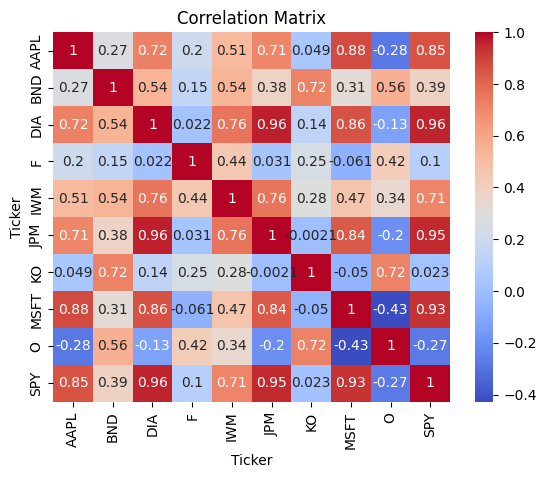

In [244]:
# plotting the correlation method in a Heatmap. credit to Alex Guerrero
sns.heatmap(corr_matrix_data, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.xticks(rotation = 90)
plt.show()